In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.model_selection import StratifiedKFold

# Data Splits

In [3]:
dataset = pd.read_csv("data_1.csv")

In [4]:
#converting int to 1 and ass to 0
dataset.TYPE[dataset.TYPE == 'int'] = 1
dataset.TYPE[dataset.TYPE == 'ass'] = 0

/tmp/ipykernel_6928/219339958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.TYPE[dataset.TYPE == 'int'] = 1
/tmp/ipykernel_6928/219339958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.TYPE[dataset.TYPE == 'ass'] = 0


In [5]:
# input
X = dataset.iloc[:, [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
# output
y = dataset.iloc[:, 15].values.astype('int')

In [6]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Logistic Regrssion

In [7]:
acc_LR = []

for train, test in kfold.split(X, y):
    
    xtrain_lr = sc_x.fit_transform(X[train])
    xtest_lr = sc_x.transform(X[test])
    
    lr = LogisticRegression(max_iter=1000, random_state=0)
    
    lr.fit(xtrain_lr,y[train])
    target_predicted_lr = lr.predict(xtest_lr)
    acc_LR.append(accuracy_score(y[test], target_predicted_lr))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_LR), np.mean(acc_LR)))

Mean accuracy for 10-fold cross validation : 0.8247252747252748


# K-nearest neighbour

Text(0, 0.5, 'Error')

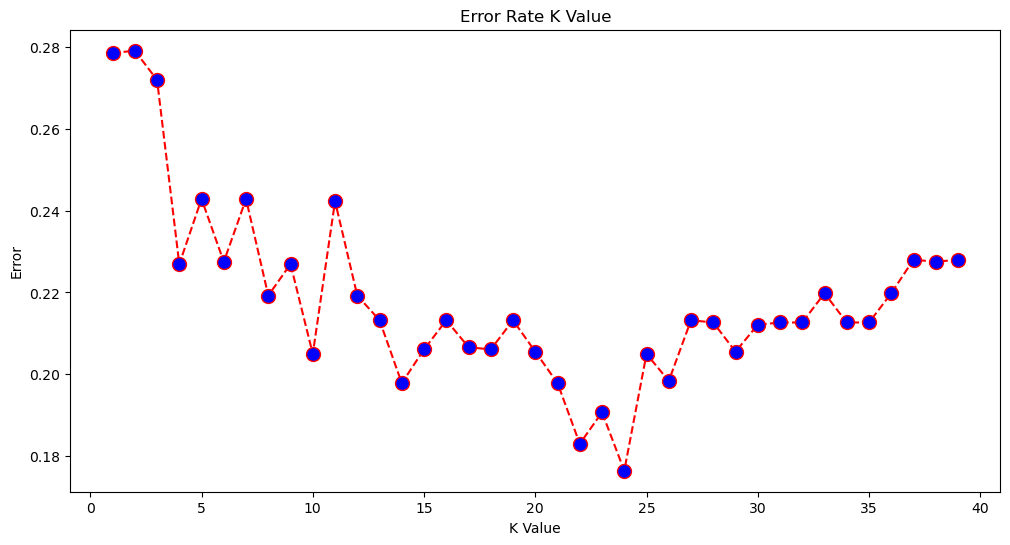

In [8]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    error_i = []
    for train, test in kfold.split(X,y):
        xtrain_kn = sc_x.fit_transform(X[train])
        xtest_kn = sc_x.transform(X[test])
        
        
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(xtrain_kn,y[train])
        target_predicted_kn = kn.predict(xtest_kn)
        #print(target_predicted_kn)
        error_i.append(np.mean(target_predicted_kn != y[test]))
        
    error.append(np.mean(error_i))
        
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

In [9]:
acc_KN = []

for train, test in kfold.split(X, y):
    
    xtrain_kn = sc_x.fit_transform(X[train])
    xtest_kn = sc_x.transform(X[test])
    
    kn = KNeighborsClassifier(n_neighbors=24)
    
    kn.fit(xtrain_kn,y[train])
    target_predicted_kn = kn.predict(xtest_kn)
    acc_KN.append(accuracy_score(y[test], target_predicted_kn))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_KN), np.mean(acc_KN)))

Mean accuracy for 10-fold cross validation : 0.8236263736263736


# Support vector classifier

In [10]:
acc_SVM = []

for train, test in kfold.split(X, y):
    
    xtrain_svm = sc_x.fit_transform(X[train])
    xtest_svm = sc_x.transform(X[test])
    
    svm = SVC(kernel='linear', random_state=0)
    
    svm.fit(xtrain_svm,y[train])
    target_predicted_svm = svm.predict(xtest_svm)
    acc_SVM.append(accuracy_score(y[test], target_predicted_svm))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_SVM), np.mean(acc_SVM)))

Mean accuracy for 10-fold cross validation : 0.8241758241758242


# Decision Tree Classifier

In [11]:
acc_DT = []

for train, test in kfold.split(X, y):
    
    xtrain_dt = sc_x.fit_transform(X[train])
    xtest_dt = sc_x.transform(X[test])
    
    dt = DecisionTreeClassifier(random_state=0)
    
    dt.fit(xtrain_dt,y[train])
    target_predicted_dt = dt.predict(xtest_dt)
    acc_DT.append(accuracy_score(y[test], target_predicted_dt))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_DT), np.mean(acc_DT)))

Mean accuracy for 10-fold cross validation : 0.7192307692307692


# Random Forest

In [12]:
acc_RF = []

for train, test in kfold.split(X, y):
    
    xtrain_rf = sc_x.fit_transform(X[train])
    xtest_rf = sc_x.transform(X[test])
    
    rf = RandomForestClassifier(max_depth = 2, random_state=0)
    
    rf.fit(xtrain_rf,y[train])
    target_predicted_rf = rf.predict(xtest_rf)
    acc_RF.append(accuracy_score(y[test], target_predicted_rf))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_RF), np.mean(acc_RF)))

Mean accuracy for 10-fold cross validation : 0.8313186813186813


# GMM Algorithm

In [13]:
# acc_gmm = []

# for train, test in kfold.split(X, y):
    
#     xtrain_gmm = sc_x.fit_transform(X[train])
#     xtest_gmm = sc_x.transform(X[test])
    
#     gmm = GaussianMixture(n_components = 2, random_state=0)
    
#     gmm.fit(xtrain_gmm,y[train])
#     target_predicted_gmm = gmm.predict(xtest_gmm)
#     print("test set       :",y[test])
#     print("predicted set  :",target_predicted_gmm)
#     # print(confusion_matrix(y[test], target_predicted_gmm))
#     # print(classification_report(y[test], target_predicted_gmm))
#     acc_gmm.append(accuracy_score(y[test], target_predicted_gmm))
#     #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

# print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_gmm), np.mean(acc_gmm)))

test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 0 0 0 0 0 0 0 0 0 0 1 1]
test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [1 1 0 1 0 0 1 1 0 0 0 0 0 0]
test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [1 0 1 1 1 0 0 0 0 1 0 0 0 0]
test set       : [1 1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 1 0 0 1 0 0 0 0 0 0 1 1]
test set       : [1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [1 0 0 1 0 1 1 0 1 1 0 1 1]
test set       : [1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 0 0 0 0 0 0 1 1 0 0 0]
test set       : [1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [1 1 0 0 0 0 0 0 0 0 0 0 1]
test set       : [1 1 1 1 1 0 0 0 0 0 0 0 0]
predicted set  : [0 0 0 0 0 0 0 0 1 0 0 0 1]
Mean accuracy for 10-fold cross validation : 0.5494505494505495


In [14]:
# acc_NB = []

# for train, test in kfold.split(X, y):
    
#     xtrain_nb = sc_x.fit_transform(X[train])
#     xtest_nb = sc_x.transform(X[test])
    
#     nb = GaussianNB(random_state=0)
    
#     nb.fit(xtrain_nb,y[train])
#     target_predicted_nb = nb.predict(xtest_nb)
#     print("test set       :",y[test])
#     print("predicted set  :",target_predicted_nb)
#     # print(confusion_matrix(y[test], target_predicted_gmm))
#     # print(classification_report(y[test], target_predicted_gmm))
#     acc_NB.append(accuracy_score(y[test], target_predicted_nb))
#     #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

# print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_NB), np.mean(acc_NB)))

TypeError: __init__() got an unexpected keyword argument 'random_state'

# Neural Network

In [14]:
import tensorflow as tf


for train, test in kfold.split(X,y):
    
    xtrain_nn = sc_x.fit_transform(X[train])
    xtest_nn = sc_x.transform(X[test])
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(60)
    model=keras.models.Sequential([

        keras.layers.Dense(512, input_dim = xtrain_nn.shape[1], activation='relu'),  
        keras.layers.Dense(512, input_dim = xtrain_nn.shape[1], activation='relu'),  
        keras.layers.Dense(units=256,activation='relu'),  
        keras.layers.Dense(units=256,activation='relu'),    
        keras.layers.Dense(units=128,activation='relu'),
        keras.layers.Dense(units=1, activation="linear"),],name="Initial_model",)
    model.summary()

ModuleNotFoundError: No module named 'tensorflow'